<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Для воспроизводимости результатов (как своих, так и между студентами)

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [x] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [x] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [x] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [x] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [5]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [6]:
missing_values = df_train.isnull().sum()
columns_with_missing = missing_values[missing_values > 0].index.tolist()
print(missing_values)

if columns_with_missing:
    print("Колонки с пропущенными значениями:", columns_with_missing)
else:
    print("Пропущенных значений нет.")

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64
Колонки с пропущенными значениями: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [7]:
duplicates = df_train.duplicated().sum()
print(f"Количество явных дубликатов в тренировочном датасете: {duplicates}")

Количество явных дубликатов в тренировочном датасете: 985


In [8]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df_train, title="Pandas Profiling Report for Train Dataset", explorative=True)
# profile.to_file("train_dataset_profile.html")

Результат приложу файлом

Мы обнаружили пропуски. Давайте избавимся от них.

- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [9]:
print("Пропуски в тренировочном наборе данных (до заполнения):")
print(df_train.isnull().sum())

print("Пропуски в тестовом наборе данных (до заполнения):")
print(df_test.isnull().sum())

Пропуски в тренировочном наборе данных (до заполнения):
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64
Пропуски в тестовом наборе данных (до заполнения):
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64


In [10]:
median_values = df_train.median(numeric_only=True)
df_train.fillna(median_values, inplace=True)
df_test.fillna(median_values, inplace=True)

In [11]:
print("Пропуски в тренировочном наборе данных (после заполнения):")
print(df_train.isnull().sum())

print("Пропуски в тестовом наборе данных (после заполнения):")
print(df_test.isnull().sum())

Пропуски в тренировочном наборе данных (после заполнения):
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats              0
dtype: int64
Пропуски в тестовом наборе данных (после заполнения):
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats             0
dtype: int64


> Отсавшиеся пропуски заполним далее

### **Задание 2 (0.5 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [x] Отобразите такие объекты (0.15 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [12]:
features = df_train.drop(columns=["selling_price"])
duplicates = features.duplicated()
num_duplicates = duplicates.sum()
print(f"Количество объектов с одинаковым признаковым описанием: {num_duplicates}")

Количество объектов с одинаковым признаковым описанием: 1159


In [13]:
duplicate_rows = df_train[features.duplicated(keep=False)]
print("Объекты с одинаковым признаковым описанием:")
duplicate_rows

Объекты с одинаковым признаковым описанием:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5.0
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [14]:
df_train = df_train[~features.duplicated(keep="first")]
print(f"Размер данных после удаления дубликатов: {df_train.shape}")

Размер данных после удаления дубликатов: (5840, 13)


In [15]:
df_train.reset_index(drop=True, inplace=True)
print("Обновленные индексы:")
print(df_train.index)

Обновленные индексы:
RangeIndex(start=0, stop=5840, step=1)


In [16]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [17]:
def preprocess_named_num(df):
    # Удаление единиц измерения и преобразование в float
    df["mileage"] = df["mileage"].str.replace(" kmpl", "").apply(lambda x: np.nan if str(x).endswith("km/kg") else x).astype(float)
    df["engine"] = df["engine"].str.replace(" CC", "").astype(float)
    df["max_power"] = df["max_power"].str.replace(" bhp", "").apply(lambda x: np.nan if x == "" else x).astype(float)

    # Удаление столбца torque
    df.drop(columns=["torque"], inplace=True)
    return df

In [18]:
df_train = preprocess_named_num(df_train)
df_test = preprocess_named_num(df_test)

In [19]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0


In [20]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,5.0


Заполняем оставшиеся пропуски

In [21]:
median_values = df_train.median(numeric_only=True)
df_train.fillna(median_values, inplace=True)
df_test.fillna(median_values, inplace=True)

In [22]:
print("Пропуски в тренировочном наборе данных (после заполнения):")
print(df_train.isnull().sum())

print("Пропуски в тестовом наборе данных (после заполнения):")
print(df_test.isnull().sum())

Пропуски в тренировочном наборе данных (после заполнения):
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64
Пропуски в тестовом наборе данных (после заполнения):
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.

In [23]:
df_train = df_train.astype({"engine": int, "seats": int})
df_test = df_test.astype({"engine": int, "seats": int})

In [24]:
print(df_train[["engine", "seats"]].dtypes)
print(df_test[["engine", "seats"]].dtypes)

engine    int32
seats     int32
dtype: object
engine    int32
seats     int32
dtype: object


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [25]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.394733,1429.448973,87.906371,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.919005,485.662834,31.640418,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,17.000000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.070000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [26]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.324190,1454.87600,90.841670,5.403000
std,4.012149,7.585539e+05,48486.218662,3.911901,521.99574,34.893389,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.587500,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,28.400000,3604.00000,280.000000,9.000000


In [27]:
df_train.describe(include=["object"])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [28]:
df_test.describe(include=["object"])

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [29]:
assert df_train.shape == (5840, 12) # исправил, так как противоречит тому, что делали выше

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

C:\Users\Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  

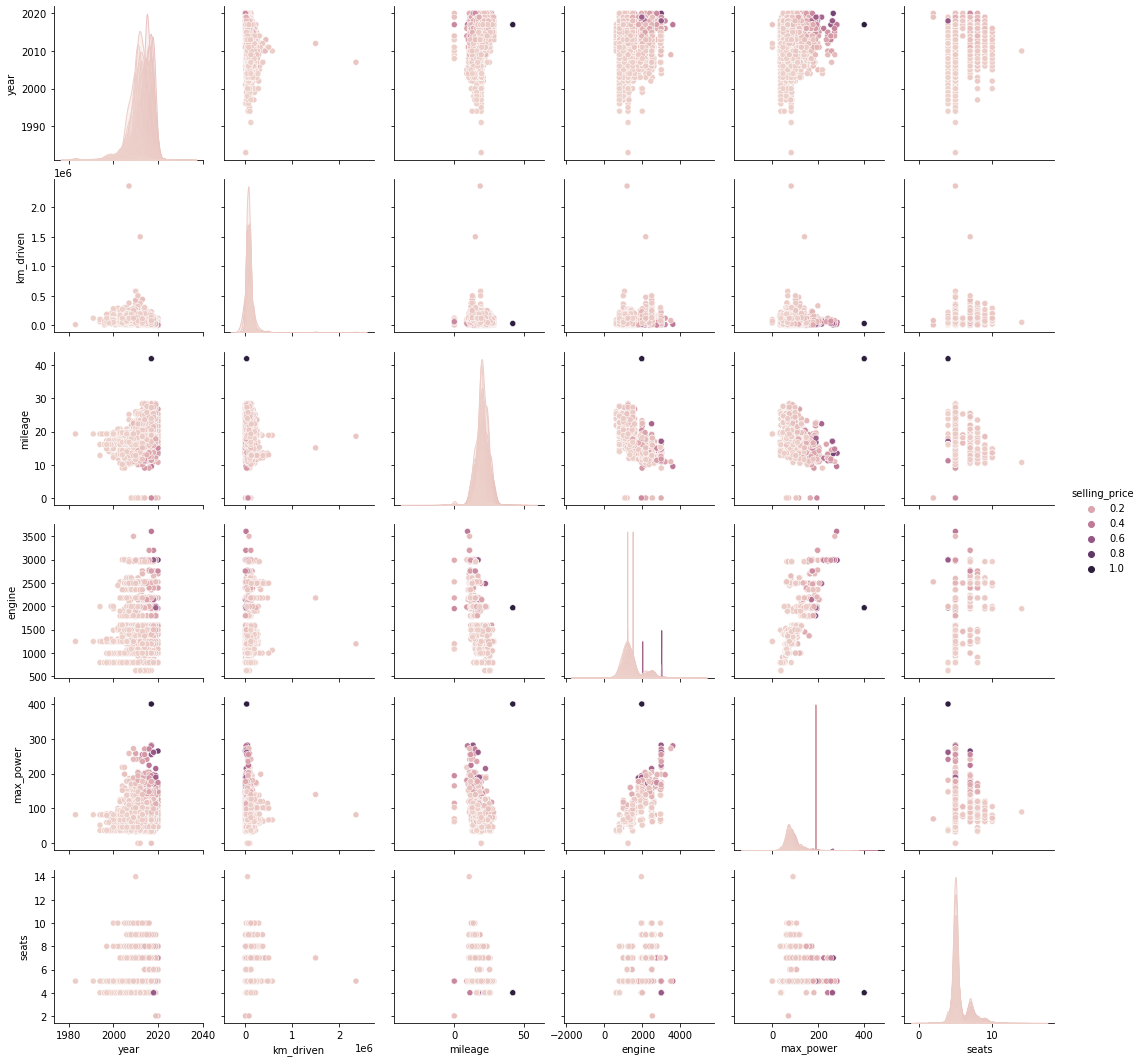

In [30]:
sns.pairplot(df_train.select_dtypes(include="number"), diag_kind="kde", hue="selling_price")
plt.show()

C:\Users\Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Arslan\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  

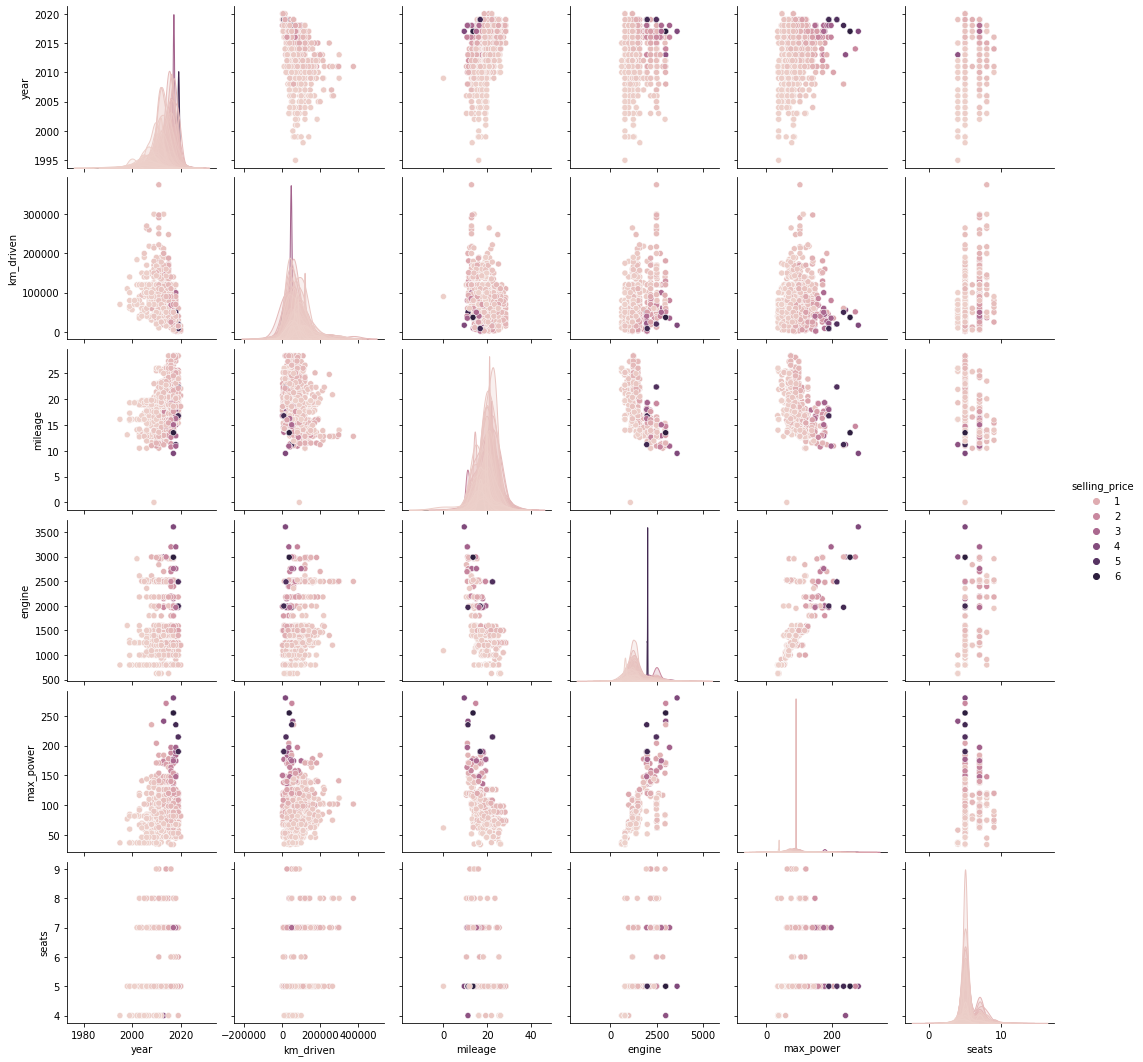

In [31]:
sns.pairplot(df_test.select_dtypes(include="number"), diag_kind="kde", hue="selling_price")
plt.show()

1. Можно ли предположить на основе распределений связь признаков с целевой переменной? -- Прямую связь нельзя, но есть закономерности для максимальной мощности и объёма двигателя.

2. Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков? -- Да, например между объёмом двигателя и максимальной мощностью.

3. Похожими ли оказались совокупности при разделении на трейн и тест? -- Не совсем, но некотрые схожы.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


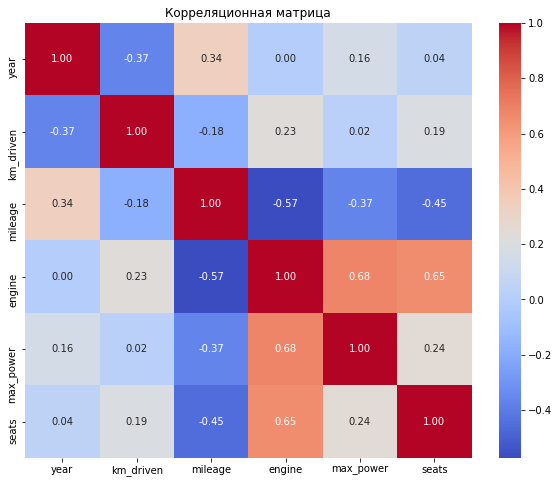

In [32]:
correlation_matrix =  df_train.select_dtypes(include="number").drop(columns="selling_price").corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

*   Год выпуска и объём дивгателя (корреляция равна нулю)
*   Между объёмом двигателя и максимальной мощностью, а так же между объёмом и количеством посадочных мест
*   Да, так как корреляция положительная (но она не так велика, чтобы зависисмость была простой)

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

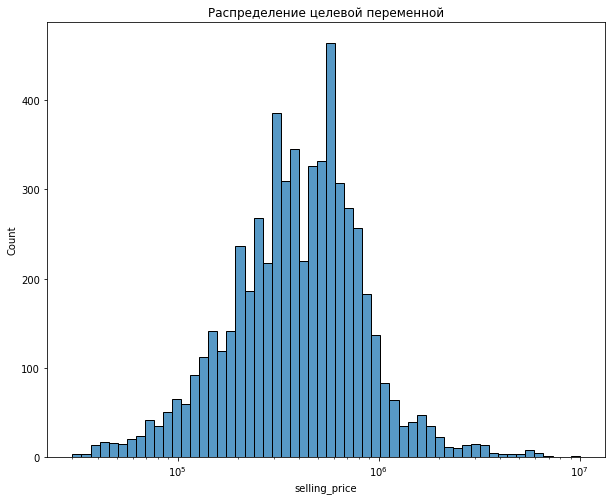

In [33]:
plt.figure(figsize=(10, 8))
sns.histplot(data = df_train, x = "selling_price", log_scale=True)
plt.title("Распределение целевой переменной")
plt.show()

Получили логнормальное распределение таргета (что в целом логично для цены квартиры).

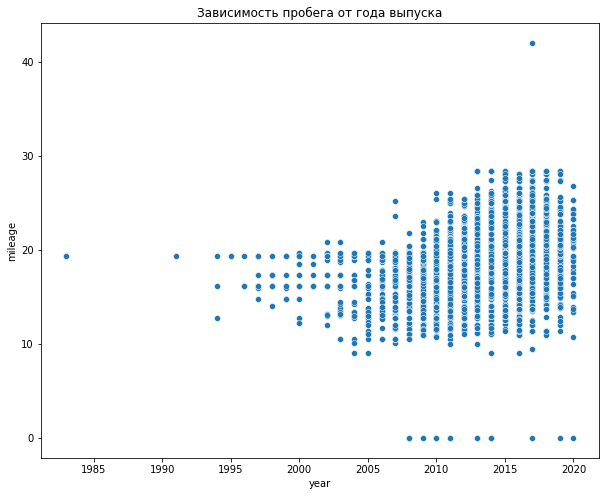

In [34]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_train, x="year", y="mileage")
plt.title("Зависимость пробега от года выпуска")
plt.show()

Подтвердили, что в основном продают либо новые машины, либо старые, но с небольшим пробегом.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [35]:
y_train = df_train["selling_price"]
X_train = df_train.drop(columns="selling_price").select_dtypes(include="number")

In [36]:
assert X_train.shape == (5840, 6)

In [37]:
y_test = df_test["selling_price"]
X_test = df_test.drop(columns="selling_price").select_dtypes(include="number")

In [38]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [39]:
from sklearn.metrics import r2_score, mean_squared_error as MSE

def print_metrics(estimator, df, label, header = None):
    pred = estimator.predict(df)
    if header:
        print(header)
    print(f"MSE: {MSE(label, pred)}")
    print(f"R2: {r2_score(label, pred)}")

In [40]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression().fit(X_train, y_train)

In [41]:
print_metrics(model_1, X_train, y_train, "Model 1 on train")
print()
print_metrics(model_1, X_test, y_test, "Model 1 on test")

Model 1 on train
MSE: 116890171494.95557
R2: 0.5922032894671243

Model 1 on test
MSE: 233356469188.1284
R2: 0.5940416200636613


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [43]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, X_train.columns),
    ],
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("linear", LinearRegression()),
])

In [44]:
model_2 = pipeline.fit(X_train, y_train)

In [45]:
print_metrics(model_2, X_train, y_train, "Model 2 on train")
print()
print_metrics(model_2, X_test, y_test, "Model 2 on test")

Model 2 on train
MSE: 116890171494.95566
R2: 0.5922032894671239

Model 2 on test
MSE: 233356469188.1198
R2: 0.5940416200636762


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [46]:
pipeline[1].coef_

array([153105.37244578, -44121.75389598,  28256.74957087,  61210.92154788,
       322451.3889774 , -23378.29900381])

In [47]:
X_train.columns[np.argmax(np.abs(pipeline[1].coef_))]

'max_power'

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [48]:
from sklearn.linear_model import Lasso

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, X_train.columns),
    ],
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("linear", Lasso()),
])

In [49]:
model_3 = pipeline.fit(X_train, y_train)

In [50]:
print_metrics(model_3, X_train, y_train, "Model 3 on train")
print()
print_metrics(model_3, X_test, y_test, "Model 3 on test")

Model 3 on train
MSE: 116890171505.06494
R2: 0.5922032894318554

Model 3 on test
MSE: 233357137050.4171
R2: 0.594040458217608


In [51]:
pipeline[1].coef_

array([153105.18441415, -44120.6250697 ,  28254.86771536,  61206.07816514,
       322452.28888207, -23375.42123202])

Коэффициенты не занулились, так как их мало и распределение целевой метрики довольно высокое.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

1. `7 * 10 = 70`
2. `1000`, ни один вес не занулился

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid_lasso = {
    "linear__alpha": [0.01, 0.1, 1, 10, 100, 1000, 10000]
}

grid_search_lasso = GridSearchCV(
    pipeline,
    param_grid = param_grid_lasso,
    cv = 10,
    scoring="neg_mean_squared_error",
)

grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object'))])),
                                       ('linear', Lasso())]),
             param_grid={'linear__alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='neg_mean_squared_error')

In [53]:
best_alpha_lasso = grid_search_lasso.best_params_["linear__alpha"]
print(f"Лучший коэффициент регуляризации (alpha) для Lasso: {best_alpha_lasso}")

best_model_lasso = grid_search_lasso.best_estimator_["linear"]
print(f"Веса лучшей модели: {best_model_lasso.coef_}")

Лучший коэффициент регуляризации (alpha) для Lasso: 1000
Веса лучшей модели: [152884.18065747 -43013.94999674  26430.93275506  56453.57561138
 323327.20202369 -20519.97981101]


In [54]:
print_metrics(grid_search_lasso.best_estimator_, X_train, y_train, "Best Lasso on train")
print()
print_metrics(grid_search_lasso.best_estimator_, X_test, y_test, "Best Lasso on test")

Best Lasso on train
MSE: 116900029470.14934
R2: 0.5921688977829893

Best Lasso on test
MSE: 234032474561.174
R2: 0.5928656079007046


**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

1. `5 * 5 * 10 = 250`
2. `{'linear__alpha': 0.1, 'linear__l1_ratio': 0.9}`

In [55]:
from sklearn.linear_model import ElasticNet

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, X_train.columns),
    ],
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("linear", ElasticNet()),
])

In [56]:
param_grid_elasticnet = {
    "linear__alpha": [0.01, 0.1, 1, 10, 100],
    "linear__l1_ratio": [0.1, 0.5, 0.7, 0.9, 1]
}

grid_search_elasticnet = GridSearchCV(
    pipeline,
    param_grid = param_grid_elasticnet,
    cv = 10,
    scoring = "neg_mean_squared_error",
)

grid_search_elasticnet.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object'))])),
                                       ('linear', ElasticNet())]),
             param_grid={'linear__alpha': [0.01, 0.1, 1, 10, 100],
                         'linear__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]},
             scoring='neg_mean_squared_error')

In [57]:
best_params_elasticnet = grid_search_elasticnet.best_params_
print(f"Лучшие параметры для ElasticNet: {best_params_elasticnet}")

best_model_elasticnet = grid_search_elasticnet.best_estimator_["linear"]
print(f"Веса лучшей модели: {best_model_lasso.coef_}")

Лучшие параметры для ElasticNet: {'linear__alpha': 0.1, 'linear__l1_ratio': 0.9}
Веса лучшей модели: [152884.18065747 -43013.94999674  26430.93275506  56453.57561138
 323327.20202369 -20519.97981101]


In [58]:
print_metrics(grid_search_elasticnet.best_estimator_, X_train, y_train, "Best ElasticNet on train")
print()
print_metrics(grid_search_elasticnet.best_estimator_, X_test, y_test, "Best ElasticNet on test")

Best ElasticNet on train
MSE: 116905570331.31075
R2: 0.592149567287309

Best ElasticNet on test
MSE: 234619164886.47186
R2: 0.5918449725833687


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [x] Удалить столбец`name`

Почти всегда можно утверждать, что первое слово, это название бренда. Оставим только его (правда иногда от `Land Rover` останется `Land`)

In [59]:
df_train["name"] = df_train["name"].apply(lambda x: x.split()[0])
df_test["name"] = df_test["name"].apply(lambda x: x.split()[0])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [x] Предобработайте столбец `name`, чтобы избежать его удаления

In [60]:
df_train["name"].value_counts()

name
Maruti           1804
Hyundai          1058
Mahindra          611
Tata              534
Toyota            309
Ford              308
Honda             308
Chevrolet         188
Renault           171
Volkswagen        153
Nissan             63
Skoda              61
Datsun             49
Mercedes-Benz      44
BMW                41
Fiat               39
Audi               31
Jeep               20
Mitsubishi          8
Volvo               8
Jaguar              7
Force               4
Isuzu               4
Land                3
MG                  3
Daewoo              3
Kia                 3
Ambassador          3
Lexus               1
Peugeot             1
Name: count, dtype: int64

In [61]:
X_train_cat = df_train.drop(columns="selling_price")

In [62]:
X_test_cat = df_test.drop(columns="selling_price")

In [63]:
assert X_train_cat.shape == (5840, 11) # Оставил `name`

In [64]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [65]:
num_cols = ["year", "km_driven", "mileage", "engine", "max_power"]
cat_cols = ["seats", "name", "fuel", "seller_type", "transmission", "owner"]

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("ohe", OneHotEncoder(drop = "first", handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, cat_cols),
        ("num", numeric_transformer, num_cols),
    ],
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("linear", Ridge()),
])

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

Получилось намного лучше!

In [67]:
param_grid_ridge = {
    "linear__alpha": [0.01, 0.1, 1, 10, 100, 1000, 10000],
}

grid_search_ridge = GridSearchCV(
    pipeline,
    param_grid = param_grid_ridge,
    cv = 10,
    scoring = "neg_mean_squared_error",
)

grid_search_ridge.fit(X_train_cat, y_train)

C:\Users\Arslan\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Arslan\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Arslan\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Arslan\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Arslan\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['seats',
                                                                          'name',
                                                                          'fuel',
                                                                          'seller_type',
                                                                          'transmission',
                                                                          'owner']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'km_driven',
                                                                          'mileage',
                                                                          'engine',
                                                                          'max_power'])])),
                                       ('linear', Ridge())]),
             param_grid={'linear__alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='neg_mean_squared_error')

In [68]:
best_params_ridge = grid_search_ridge.best_params_
print(f"Лучшие параметры для Ridge: {best_params_ridge}")

best_model_ridge = grid_search_ridge.best_estimator_["linear"]
print(f"Веса лучшей модели: {best_model_ridge.coef_}")

Лучшие параметры для Ridge: {'linear__alpha': 1}
Веса лучшей модели: [ 354488.62174487  -90514.05966207 -139150.75389571  -14789.96208694
  -75943.94147472  -24347.97446961   31427.07531793  -44965.01005091
  416804.09644176  977209.32409854 -508361.7371075    32526.93540483
 -533647.97174071 -477996.29131265 -386313.44291994 -441691.99395327
 -449792.81272309 -410619.26907965   48765.11875143  656382.26715334
  104653.13793347  -35585.02913546  896129.22940339 1088385.12223701
  151115.32102539 -439842.69320421 -361292.72647121  600524.01747068
 -171584.13434084 -435394.52738687  -18583.33491381 -452988.84297686
 -443679.34245297 -534766.30552426 -173910.97849467 -474739.04263928
 1629764.84824595   86565.27573027  135236.13988238   18790.99775903
  -64999.50891053  -47974.82405215  -88165.41952027  -41609.0215767
  -55166.71325635 2609527.91986468  -35461.56934489  164189.28870173
  -29305.03449478   18328.66637591   33344.98573673  203049.85778583]


In [69]:
print_metrics(grid_search_ridge.best_estimator_, X_train_cat, y_train, "Best Ridge on train")
print()
print_metrics(grid_search_ridge.best_estimator_, X_test_cat, y_test, "Best Ridge on test")

Best Ridge on train
MSE: 65874498824.36313
R2: 0.7701825261695644

Best Ridge on test
MSE: 130663650498.15652
R2: 0.7726910933416792


C:\Users\Arslan\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [70]:
def business_metric(y_true, y_pred):
    relative_error = np.abs(y_pred - y_true) / y_true
    success_rate = np.mean(relative_error <= 0.1)
    return success_rate

In [71]:
models = [
    model_1,
    model_2,
    model_3,
    grid_search_lasso.best_estimator_,
    grid_search_elasticnet.best_estimator_,
]

In [72]:
for model in models:
    print(business_metric(y_test, model.predict(X_test)))

0.225
0.225
0.225
0.222
0.226


In [73]:
print(business_metric(y_test, grid_search_ridge.best_estimator_.predict(X_test_cat)))

0.305


C:\Users\Arslan\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Лучше всего задачу бизнеса решает `Ridge` с категориальными признаками.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [74]:
%%writefile main.py

from fastapi import FastAPI, UploadFile, HTTPException
from fastapi.responses import StreamingResponse
from pydantic import BaseModel
from typing import List
import pandas as pd
import pickle
import io

with open("best_model.pickle", "rb") as model_file:
    model = pickle.load(model_file)

app = FastAPI()

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float

class Items(BaseModel):
    objects: List[Item]

def preprocess_item(item: Item) -> dict:
    """
    Преобразует объект Item в формат, подходящий для модели.
    """
    return {
        "name": item.name,
        "year": item.year,
        "selling_price": item.selling_price,
        "km_driven": item.km_driven,
        "fuel": item.fuel,
        "seller_type": item.seller_type,
        "transmission": item.transmission,
        "owner": item.owner,
        "mileage": item.mileage,
        "engine": item.engine,
        "max_power": item.max_power,
        "torque": item.torque,
        "seats": item.seats,
    }

@app.post("/predict_item")
def predict_item(item: Item) -> float:
    """
    Предсказывает стоимость машины для одного объекта.
    """
    try:
        data = pd.DataFrame([preprocess_item(item)])
        prediction = model.predict(data)
        return prediction[0]
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

@app.post("/predict_items")
def predict_items(file: UploadFile):
    """
    Принимает CSV-файл с признаками объектов и возвращает CSV-файл с предсказаниями.
    """
    try:
        contents = file.file.read()
        data = pd.read_csv(io.StringIO(contents.decode("utf-8")))

        required_columns = [
            "name", "year", "km_driven", "fuel",
            "seller_type", "transmission", "owner", "mileage",
            "engine", "max_power", "seats"
        ]
        if not all(column in data.columns for column in required_columns):
            raise HTTPException(status_code=400, detail="Некорректный формат файла. Проверьте столбцы.")

        predictions = model.predict(data)

        data["predicted_price"] = predictions

        output = io.StringIO()
        data.to_csv(output, index=False)
        output.seek(0)

        response = StreamingResponse(
            iter([output.getvalue()]),
            media_type="text/csv"
        )
        response.headers["Content-Disposition"] = "attachment; filename=predictions.csv"
        return response

    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

Overwriting main.py


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

In [75]:
# !uvicorn main:app --host 0.0.0.0 --port 8000

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

In [76]:
import pickle

In [77]:
with open("best_model.pickle", "wb") as f:
    pickle.dump(grid_search_ridge.best_estimator_, f)

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

